# Parkinson's Disease Detection From Vocal Biomarker
by Nasrul Hakim

## Introduction
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

![https://www.parkinson.org/sites/default/files/neurons%20.jpg](https://www.parkinson.org/sites/default/files/neurons%20.jpg)

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis.

The advancement of artificial intelligence (AI), technologies, and computer sciences has paved the way for new opportunities in the field of digital health, the ultimate goal of which is to improve the lives of people and healthcare professionals through the use of technology. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

### Parkinson's Desease
Vocal biomarkers have been studied primarily in the field of neurodegenerative disorders, particularly Parkinson's disease, where voice disorders are prevalent (up to 89%). Voice changes are expected to be used as an early diagnostic biomarker or marker of disease progression, eventually supplementing the state-of-the-art manual examination to assess symphony. 

These vocal problems are mostly associated with phonation and articulation, and include pitch changes, diminished energy in the upper harmonic regions, and imprecise vowel and consonant articulation, which results in impaired intelligibility. While alterations in voice are frequently disregarded by both patients and physicians during the early stages of the disease, objective assessments indicate that up to 78% of people with early stage Parkinson's disease have changes in voice features.

### Vocal biomarkers
The human voice is a rich medium that is used extensively in interpersonal communication. It is one of the most natural and energy-efficient modes of communication. The voice, as complex arrays of sound emanating from our vocal chords, has a plethora of data and is essential for social interaction because it enables us to communicate insights about our emotions, anxieties, sentiments, and stimulation through modulation of its tone or pitch.

A biomarker is a factor that can be objectively measured and evaluated to represent a biological or pathogenic process, or a pharmacological response to a therapeutic intervention, and can be used as a surrogate marker of a clinical endpoint. A vocal biomarker is a signature, feature, or combination of features from the audio signal of the voice that is associated with a clinical outcome and can be used to monitor patients, diagnose a condition, or grade the severity or stages of a disease, or for drug development.

### Extracting Audio Feature
Prior to data analysis, it is necessary to convert the audio signal to "features," which are the signal's most prominent and discriminating qualities that will subsequently be used to train machine learning algorithms. Numerous approaches for deriving acoustic features from temporal, frequency, cepstral, wavelet, and time-frequency domains have been proposed in many literatures. 
* **Prosodic** - pitch, formants, energy, jitter, and shimmer
* **Spectral characteristics** - spectral flux, slope, centroid, entropy, roll-off, and flatness 
* **Voice quality** - zero-crossing rate, harmonic-to-noise ratio, noise-to-harmonic ratio
* **Phonation** - fundamental frequency, pitch period entropy) parameters can all be extracted and analysed

The appropriate selection of attributes is highly dependent on the type of voice issue, condition, and recording method. For instance, while acoustic features extracted from sustained vowel phonations or diadochokinetic recordings are frequently used to detect Parkinson's disease, linguistic features extracted from spontaneous or semi-spontaneous speech may be a better choice for estimating Alzheimer's disease or mental health disorders.

## Parkinson's Data Set
The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders. This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column. 

### Attribute Information
* **name** - ASCII subject name and recording number
* **MDVP:Fo(Hz)** - Average vocal fundamental frequency
* **MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency
* **MDVP:Flo(Hz)** - Minimum vocal fundamental frequency
* **MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP** - Several measures of variation in fundamental frequency
* **MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** - Several measures of variation in amplitude
* **NHR, HNR** - Two measures of the ratio of noise to tonal components in the voice
* **status** - The health status of the subject (one) - Parkinson's, (zero) - healthy
* **RPDE, D2** - Two nonlinear dynamical complexity measures
* **DFA - Signal** fractal scaling exponent
* **spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation

---
### Import Libraries

In [1]:
!pip install pycaret

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

from sklearn.metrics import *
import scikitplot as skplt

df = pd.read_csv("Final_data.csv")


### Exploratory Data Analysis

In [14]:
df = df[df['language'] == "English"]
df.drop(['Person'], axis=1, inplace=True)
df.drop(['Wav file'], axis=1, inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer (dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE,language
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,-4.813031,0.266482,2.301442,0.284654,English
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,-4.075192,0.335590,2.486855,0.368674,English
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,-4.443179,0.311173,2.342259,0.332634,English
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,-4.117501,0.334147,2.405554,0.368975,English
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,-3.747787,0.234513,2.332180,0.410335,English


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 191
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MDVP:Fo(Hz)        192 non-null    float64
 1   MDVP:Fhi(Hz)       192 non-null    float64
 2   MDVP:Flo(Hz)       192 non-null    float64
 3   MDVP:Jitter(%)     192 non-null    float64
 4   MDVP:Jitter(Abs)   192 non-null    float64
 5   MDVP:RAP           192 non-null    float64
 6   MDVP:PPQ           192 non-null    float64
 7   Jitter:DDP         192 non-null    float64
 8   MDVP:Shimmer       192 non-null    float64
 9   MDVP:Shimmer (dB)  192 non-null    float64
 10  Shimmer:APQ3       192 non-null    float64
 11  Shimmer:APQ5       192 non-null    float64
 12  MDVP:APQ           192 non-null    float64
 13  Shimmer:DDA        192 non-null    float64
 14  NHR                192 non-null    float64
 15  HNR                192 non-null    float64
 16  status             192 non-null

In [16]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer (dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,153.817917,196.776349,116.389750,0.006114,0.000044,0.003245,0.003377,0.009737,0.029314,0.277448,...,0.023701,0.046404,0.023873,21.976073,0.750000,0.497796,-5.710404,0.224700,2.371348,0.204615
std,41.548965,92.158243,43.508538,0.004642,0.000034,0.002852,0.002598,0.008554,0.018308,0.186884,...,0.016387,0.029694,0.039213,4.288654,0.434145,0.103722,1.073304,0.082583,0.374673,0.088719
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,-7.964984,0.006274,1.423287,0.044539
25%,117.262000,134.549750,85.286250,0.003450,0.000020,0.001658,0.001855,0.004975,0.016538,0.148750,...,0.013085,0.024802,0.005890,19.251750,0.750000,0.421768,-6.456900,0.173470,2.094037,0.136103
50%,148.367000,172.917500,104.376000,0.004940,0.000030,0.002485,0.002680,0.007455,0.022965,0.219000,...,0.018125,0.038335,0.011545,22.152000,1.000000,0.493649,-5.730418,0.217525,2.352425,0.193324
75%,182.393500,224.093750,139.504250,0.007285,0.000060,0.003747,0.003913,0.011250,0.037610,0.348500,...,0.029197,0.057193,0.024960,25.053750,1.000000,0.586366,-5.127827,0.271301,2.614510,0.252080
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,-2.434031,0.450493,3.671155,0.527367


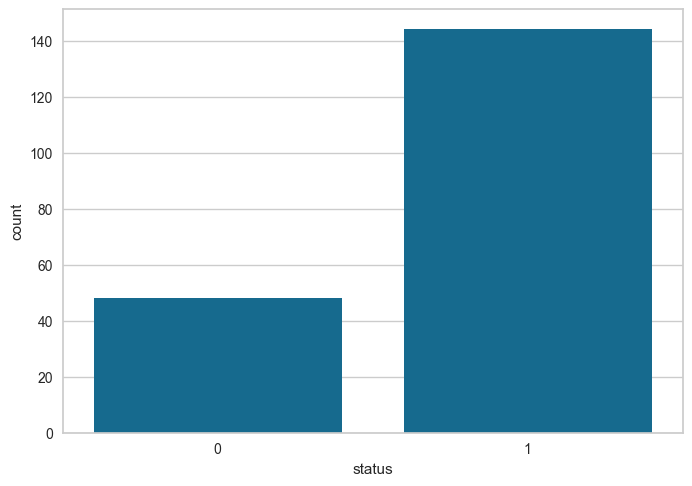

In [17]:
ax = sns.countplot(x="status", data=df)

### Split training & test dataset

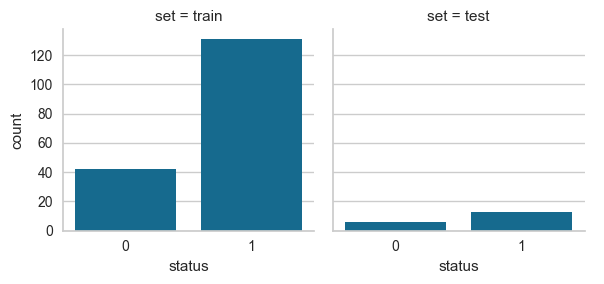

Training dataset           : 173
Unseen data for validation : 19


In [18]:
test_df = df.sample(frac=0.1)
train_df = df.drop(test_df.index).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

test_df['set'] = 'test'
train_df['set'] = 'train'

ax = sns.catplot(x="status", col="set", data=pd.concat([train_df, test_df]), kind="count", height=3)
plt.show()

print('Training dataset           :', len(train_df))
print('Unseen data for validation :', len(test_df))

### Setup environment

In [19]:
clf1 = setup(data = train_df, target = 'status',ignore_features = ['name'],fix_imbalance=True, session_id=123)

,Description,Value
0,Session id,123
1,Target,status
2,Target type,Binary
3,Original data shape,"(173, 24)"
4,Transformed data shape,"(236, 24)"
5,Transformed train set shape,"(184, 24)"
6,Transformed test set shape,"(52, 24)"
7,Ignore features,1
8,Numeric features,21
9,Categorical features,2


### Model selection

In [20]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:01:49
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9250,0.9796,0.9556,0.9527,0.9488,0.7854,0.8139,0.0490
xgboost,Extreme Gradient Boosting,0.9000,0.9517,0.9122,0.9627,0.9347,0.7057,0.7125,0.0330
rf,Random Forest Classifier,0.8917,0.9381,0.9000,0.9627,0.9213,0.7225,0.7592,0.0610
lightgbm,Light Gradient Boosting Machine,0.8917,0.9320,0.9333,0.9300,0.9295,0.6788,0.6872,20.4830
gbc,Gradient Boosting Classifier,0.8667,0.9219,0.9011,0.9296,0.9108,0.6178,0.6289,0.0510
ada,Ada Boost Classifier,0.8583,0.9098,0.9122,0.9134,0.9096,0.5691,0.5828,0.0390
dt,Decision Tree Classifier,0.8506,0.8256,0.8678,0.9398,0.8964,0.6059,0.6328,0.0220
lr,Logistic Regression,0.7929,0.9033,0.7811,0.9502,0.8493,0.4899,0.5258,0.0370
lda,Linear Discriminant Analysis,0.7923,0.9283,0.7800,0.9505,0.8389,0.5161,0.5521,0.0210
ridge,Ridge Classifier,0.7679,0.8848,0.7600,0.9380,0.8288,0.4417,0.4794,0.0200


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

### Create XGBoost Model

In [21]:
xgboost  = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9167,1.0000,0.8889,1.0000,0.9412,0.8000,0.8165
3,0.9167,0.9630,0.8889,1.0000,0.9412,0.8000,0.8165
4,0.9167,0.9259,0.8889,1.0000,0.9412,0.8000,0.8165
5,0.9167,1.0000,0.8889,1.0000,0.9412,0.8000,0.8165
6,0.9167,1.0000,0.8889,1.0000,0.9412,0.8000,0.8165
7,0.6667,0.7778,0.8889,0.7273,0.8000,-0.1429,-0.1741
8,0.9167,1.0000,0.8889,1.0000,0.9412,0.8000,0.8165


In [22]:
extra_tree = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9167,0.9444,1.0000,0.9000,0.9474,0.7500,0.7746
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9167,1.0000,0.8889,1.0000,0.9412,0.8000,0.8165
4,0.7500,0.9259,0.6667,1.0000,0.8000,0.5000,0.5774
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9167,0.9630,1.0000,0.9000,0.9474,0.7500,0.7746
8,0.8333,0.9630,1.0000,0.8182,0.9000,0.4286,0.5222


### Tuned Model

In [23]:
tuned_xgboost = tune_model(xgboost)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:06:15
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9167,1.0000,1.0000,0.9000,0.9474,0.7500,0.7746
2,0.9167,0.9630,0.8889,1.0000,0.9412,0.8000,0.8165
3,0.9167,0.9630,0.8889,1.0000,0.9412,0.8000,0.8165
4,0.8333,0.9259,0.7778,1.0000,0.8750,0.6364,0.6831
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.7500,0.7407,1.0000,0.7500,0.8571,0.0000,0.0000
8,0.9167,0.9630,1.0000,0.9000,0.9474,0.7500,0.7746


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [24]:
tuned_extra_tree = tune_model(extra_tree)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,1.0000,0.9000,1.0000,0.9474,0.8060,0.8216
1,0.9167,0.8889,1.0000,0.9000,0.9474,0.7500,0.7746
2,0.9167,1.0000,0.8889,1.0000,0.9412,0.8000,0.8165
3,0.9167,1.0000,0.8889,1.0000,0.9412,0.8000,0.8165
4,0.7500,0.9259,0.6667,1.0000,0.8000,0.5000,0.5774
5,0.9167,1.0000,0.8889,1.0000,0.9412,0.8000,0.8165
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9167,0.8519,1.0000,0.9000,0.9474,0.7500,0.7746
8,0.9167,1.0000,1.0000,0.9000,0.9474,0.7500,0.7746


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Evaluate training performance

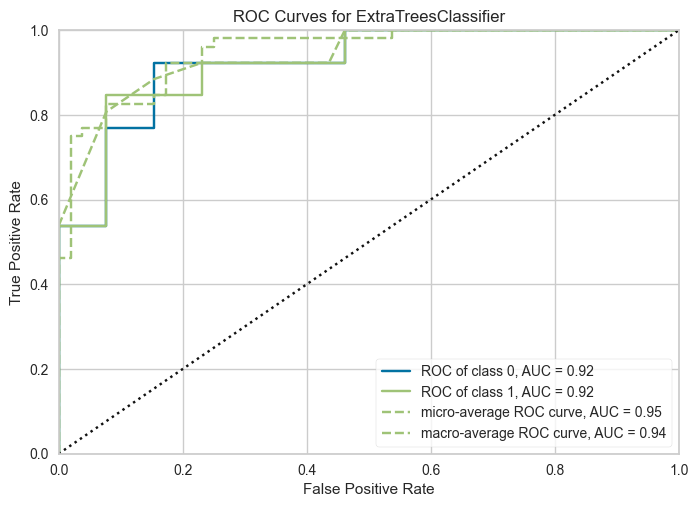

In [28]:
plot_model(extra_tree, plot = 'auc')

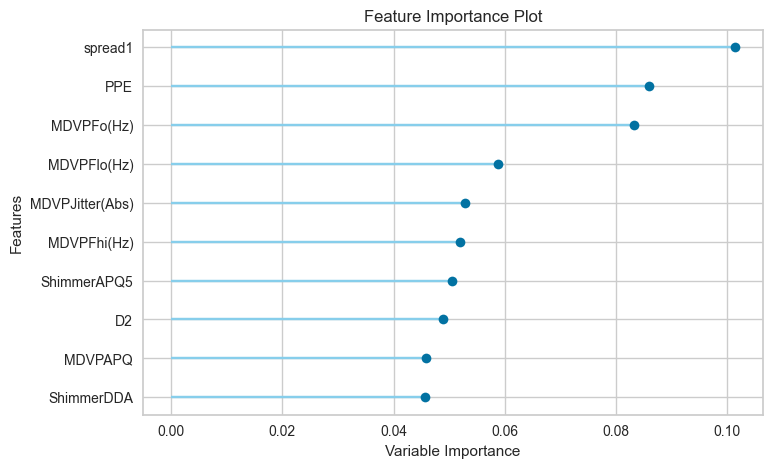

In [29]:
plot_model(extra_tree, plot='feature')


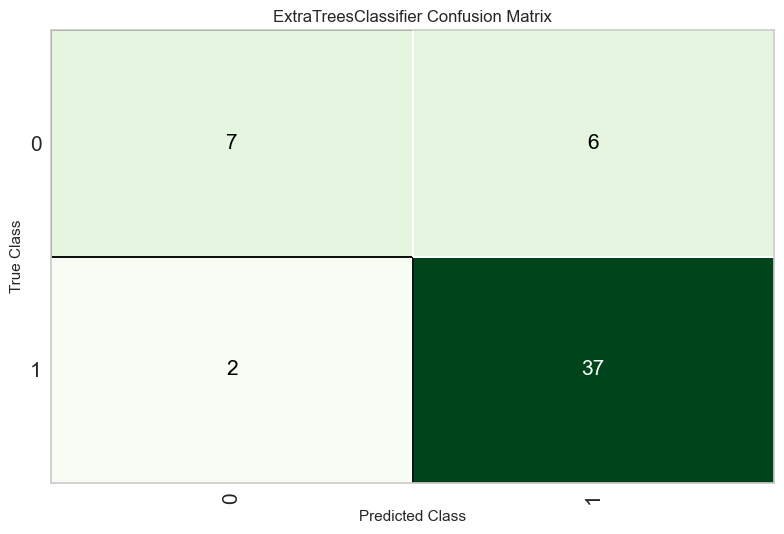

In [30]:

plot_model(extra_tree, plot = 'confusion_matrix')

### Evaluate on unseen data

In [31]:
final_extra_tree = finalize_model(extra_tree)

In [34]:
unseen_predictions = predict_model(extra_tree, data=test_df)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [36]:
unseen_predictions

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer (dB),...,RPDE,spread1,spread2,D2,PPE,language,set,status,prediction_label,prediction_score
0,115.379997,123.109001,108.634003,0.00332,0.00003,0.00160,0.00199,0.00480,0.01503,0.137,...,0.405991,-5.966779,0.197938,1.974857,0.184067,English,test,0,0,0.87
1,171.041000,208.313004,75.500999,0.00455,0.00003,0.00250,0.00234,0.00750,0.01966,0.186,...,0.418622,-6.183590,0.226278,2.589702,0.147403,English,test,1,1,0.80
2,184.054993,196.537003,166.977005,0.00258,0.00001,0.00134,0.00147,0.00403,0.01463,0.132,...,0.306443,-7.044105,0.063412,2.361532,0.115730,English,test,1,1,0.53
3,116.014000,141.781006,110.654999,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.417356,-3.747787,0.234513,2.332180,0.410335,English,test,1,1,0.99
4,180.977997,200.125000,155.494995,0.00406,0.00002,0.00220,0.00244,0.00659,0.03852,0.331,...,0.583574,-5.657899,0.315903,3.098256,0.200423,English,test,1,1,0.91
5,202.544006,241.350006,164.167999,0.00254,0.00001,0.00100,0.00133,0.00301,0.02662,0.228,...,0.497480,-6.132663,0.220617,2.576563,0.159777,English,test,1,1,0.61
6,222.235992,231.345001,205.494995,0.00266,0.00001,0.00152,0.00144,0.00457,0.01643,0.145,...,0.364867,-6.966321,0.095882,2.278687,0.103224,English,test,0,0,0.93
7,188.619995,216.302002,165.981995,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,0.722,...,0.552870,-3.377325,0.335357,3.274865,0.418646,English,test,1,1,1.00
8,129.335999,139.867004,118.603996,0.00490,0.00004,0.00165,0.00183,0.00495,0.02498,0.228,...,0.420383,-6.836811,0.269866,2.223719,0.147491,English,test,0,0,0.59
9,173.897995,211.350006,74.677002,0.00448,0.00003,0.00237,0.00254,0.00710,0.06727,0.650,...,0.599371,-5.783272,0.299793,3.007096,0.194052,English,test,1,1,0.96


              precision    recall  f1-score   support

   parkinson       1.00      1.00      1.00         6
      normal       1.00      1.00      1.00        13

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



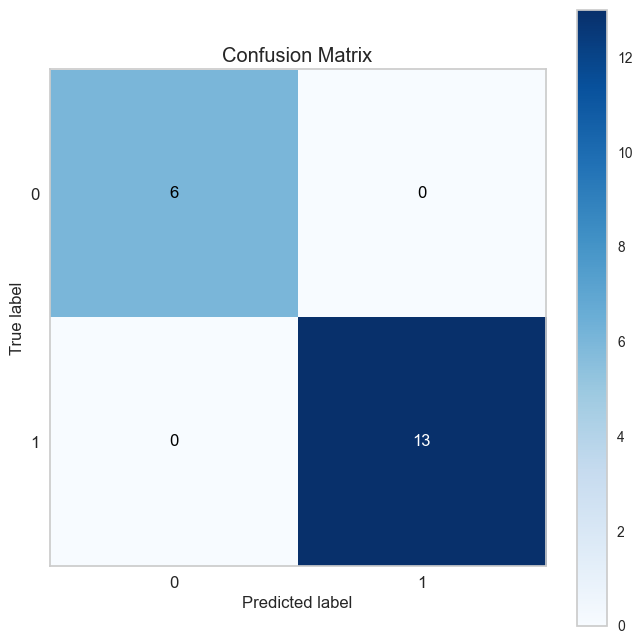

In [37]:
class_names=['parkinson', 'normal']
print(classification_report(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, target_names=class_names,zero_division=0))
cm = skplt.metrics.plot_confusion_matrix(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, figsize=(8, 8), normalize=False)

# Italian Data

In [41]:
df = pd.read_csv("Final_data.csv")
df = df[df['language'] == "Italian"]
df.drop(['Person'], axis=1, inplace=True)
df.drop(['Wav file'], axis=1, inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer (dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE,language
192,192.740471,414.573864,130.582584,37.457992,1.672498,1.672498,2.705771,0.002564,0.005859,-44.643531,...,0.013990,1.991924,0.502027,0,-1.442695e-10,2.058887,4.132785,0.008242,-0.0,Italian
193,137.858752,194.525933,89.190534,14.367607,4.641578,4.641578,5.811661,0.000648,0.001665,-55.574045,...,0.005159,5.146087,0.194322,0,-1.442695e-10,28.694915,61.178421,0.281184,-0.0,Italian
194,123.383510,132.099881,106.066017,3.750097,1.573683,1.573683,1.869110,0.000278,0.000567,-64.929528,...,0.007968,71.422560,0.014001,0,-1.442695e-10,7.294496,13.143943,0.165020,-0.0,Italian
195,157.311536,161.697327,142.401318,1.331257,0.465485,0.465485,0.607655,0.002563,0.008715,-41.194715,...,0.026886,2.031106,0.492343,0,-1.442695e-10,1.927851,3.911527,0.010362,-0.0,Italian
196,152.094185,156.189323,122.543659,2.598718,0.715937,0.715937,0.827635,0.004425,0.011541,-38.755198,...,0.025786,2.158257,0.463337,0,-1.442695e-10,2.345225,4.422407,0.009549,-0.0,Italian


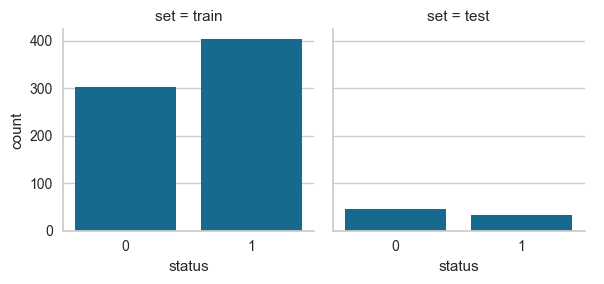

Training dataset           : 707
Unseen data for validation : 79


In [42]:
test_df = df.sample(frac=0.1)
train_df = df.drop(test_df.index).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

test_df['set'] = 'test'
train_df['set'] = 'train'

ax = sns.catplot(x="status", col="set", data=pd.concat([train_df, test_df]), kind="count", height=3)
plt.show()

print('Training dataset           :', len(train_df))
print('Unseen data for validation :', len(test_df))

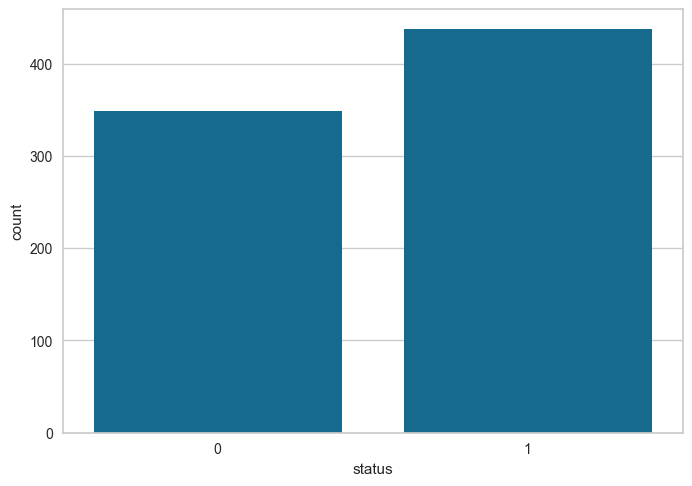

In [44]:
ax = sns.countplot(x="status", data=df)

In [45]:
clf1 = setup(data = train_df, target = 'status',ignore_features = ['name'],fix_imbalance=True, session_id=123)

,Description,Value
0,Session id,123
1,Target,status
2,Target type,Binary
3,Original data shape,"(707, 24)"
4,Transformed data shape,"(777, 24)"
5,Transformed train set shape,"(564, 24)"
6,Transformed test set shape,"(213, 24)"
7,Ignore features,1
8,Numeric features,21
9,Categorical features,2


In [46]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8438,0.9049,0.8437,0.8792,0.8590,0.6843,0.6891,0.0750
et,Extra Trees Classifier,0.8400,0.9178,0.8473,0.8715,0.8570,0.6753,0.6801,0.0490
xgboost,Extreme Gradient Boosting,0.8360,0.9031,0.8507,0.8632,0.8547,0.6663,0.6708,0.0470
lightgbm,Light Gradient Boosting Machine,0.8239,0.8935,0.8331,0.8564,0.8432,0.6423,0.6454,59.9390
gbc,Gradient Boosting Classifier,0.8034,0.8764,0.8009,0.8507,0.8215,0.6027,0.6095,0.0660
ada,Ada Boost Classifier,0.7792,0.8437,0.8009,0.8142,0.8057,0.5495,0.5530,0.0460
dt,Decision Tree Classifier,0.7567,0.7568,0.7581,0.8040,0.7783,0.5093,0.5130,0.0230
lda,Linear Discriminant Analysis,0.6900,0.7348,0.6877,0.7516,0.7164,0.3753,0.3791,0.0180
knn,K Neighbors Classifier,0.6899,0.7346,0.7266,0.7356,0.7263,0.3670,0.3730,0.1610
ridge,Ridge Classifier,0.6393,0.6730,0.6735,0.6915,0.6794,0.2658,0.2688,0.0220


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [50]:
random_forest = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9213,0.9286,0.8667,0.8966,0.7541,0.7566
1,0.8800,0.9018,0.9643,0.8438,0.9000,0.7517,0.7622
2,0.9000,0.9614,0.8966,0.9286,0.9123,0.7961,0.7967
3,0.8600,0.9171,0.8621,0.8929,0.8772,0.7145,0.7151
4,0.9184,0.9405,0.8929,0.9615,0.9259,0.8353,0.8381
5,0.7959,0.9073,0.7500,0.8750,0.8077,0.5930,0.6010
6,0.7755,0.8376,0.7500,0.8400,0.7925,0.5497,0.5539
7,0.7959,0.9073,0.7500,0.8750,0.8077,0.5930,0.6010
8,0.8367,0.8724,0.8929,0.8333,0.8621,0.6627,0.6650


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
tuned_rf = tune_model(random_forest)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8600,0.9156,0.8929,0.8621,0.8772,0.7145,0.7151
1,0.8000,0.8734,0.8929,0.7812,0.8333,0.5861,0.5943
2,0.8800,0.9507,0.8966,0.8966,0.8966,0.7537,0.7537
3,0.7600,0.9048,0.8276,0.7742,0.8000,0.5008,0.5026
4,0.8163,0.9235,0.8214,0.8519,0.8364,0.6272,0.6278
5,0.7959,0.8622,0.7143,0.9091,0.8000,0.5977,0.6159
6,0.7551,0.7704,0.7857,0.7857,0.7857,0.5000,0.5000
7,0.7551,0.8503,0.7143,0.8333,0.7692,0.5116,0.5185
8,0.7755,0.8418,0.7857,0.8148,0.8000,0.5444,0.5448


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


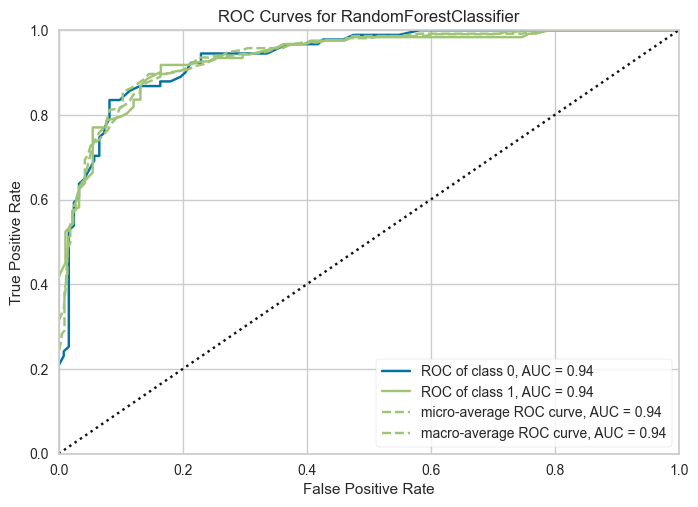

In [52]:
plot_model(random_forest, plot = 'auc')

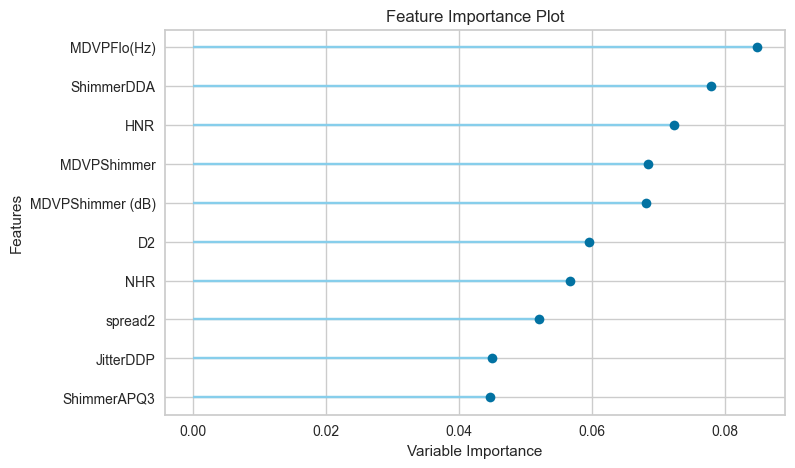

In [53]:
plot_model(random_forest, plot = 'feature')

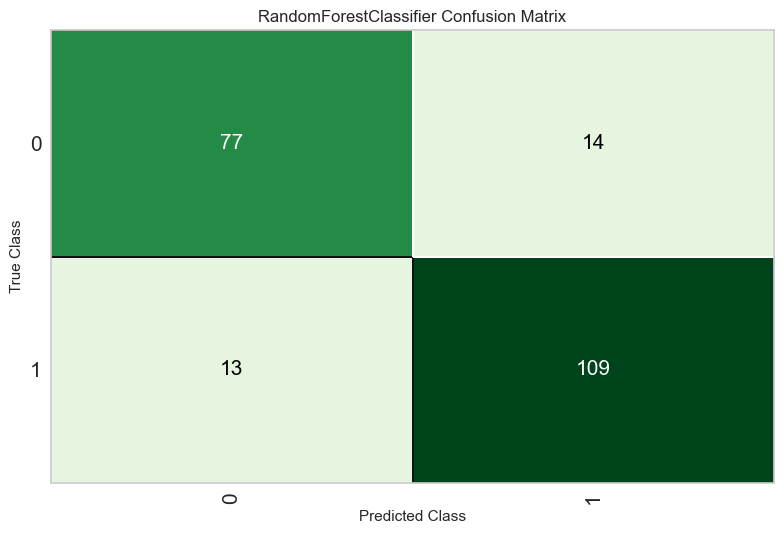

In [54]:
plot_model(random_forest, plot = 'confusion_matrix')

In [55]:
final_rf = finalize_model(random_forest)

In [56]:
unseen_predictions = predict_model(final_rf, data=test_df)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7722,0.8518,0.7576,0.7143,0.7353,0.5356,0.5363


In [58]:
unseen_predictions

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer (dB),...,RPDE,spread1,spread2,D2,PPE,language,set,status,prediction_label,prediction_score
0,159.547470,261.165161,75.000000,26.639261,7.005037,7.005037,9.546342,0.000505,0.001553,-56.175598,...,-1.442695e-10,37.670059,92.750076,0.260323,0.025467,Italian,test,1,1,0.54
1,172.468201,444.329254,92.335831,30.810225,8.180232,8.180232,11.138926,0.000517,0.001196,-58.444885,...,-1.442695e-10,62.397556,133.938004,0.339857,0.008358,Italian,test,0,0,0.93
2,125.711708,132.099884,119.055077,3.035338,0.352337,0.352337,0.544620,0.001357,0.002738,-51.252369,...,-1.442695e-10,6.578733,10.244788,0.016362,0.000000,Italian,test,1,1,0.76
3,159.871201,273.516754,92.335831,19.678335,6.567322,6.567322,9.083069,0.000425,0.001046,-59.610062,...,-1.442695e-10,44.176319,79.156029,0.327945,-0.000000,Italian,test,0,0,0.73
4,153.383545,252.268921,78.547058,21.699926,5.008162,5.008162,7.315110,0.000503,0.001396,-57.100182,...,-1.442695e-10,31.517488,67.228363,0.263529,0.005475,Italian,test,1,0,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,154.701279,162.634033,128.339249,2.040646,0.529803,0.529803,0.635093,0.001430,0.004807,-46.362316,...,-1.442695e-10,2.266654,4.254718,0.009843,-0.000000,Italian,test,0,1,0.70
75,139.529312,146.573990,135.187576,1.702269,0.493810,0.493810,0.659926,0.002964,0.004234,-47.465202,...,-1.442695e-10,2.600365,6.924388,0.772223,-0.000000,Italian,test,0,1,0.95
76,219.986984,227.357483,142.401321,3.820909,1.135859,1.135859,1.423145,0.004429,0.018483,-34.664482,...,-1.442695e-10,2.664813,5.381088,0.010870,-0.000000,Italian,test,0,0,0.77
77,99.658073,158.004150,75.000000,20.549915,3.697191,3.697191,5.016510,0.000173,0.000674,-63.422337,...,-1.442695e-10,15.403735,34.995899,0.206962,0.018993,Italian,test,1,1,0.97


              precision    recall  f1-score   support

   parkinson       0.82      0.78      0.80        46
      normal       0.71      0.76      0.74        33

    accuracy                           0.77        79
   macro avg       0.77      0.77      0.77        79
weighted avg       0.77      0.77      0.77        79



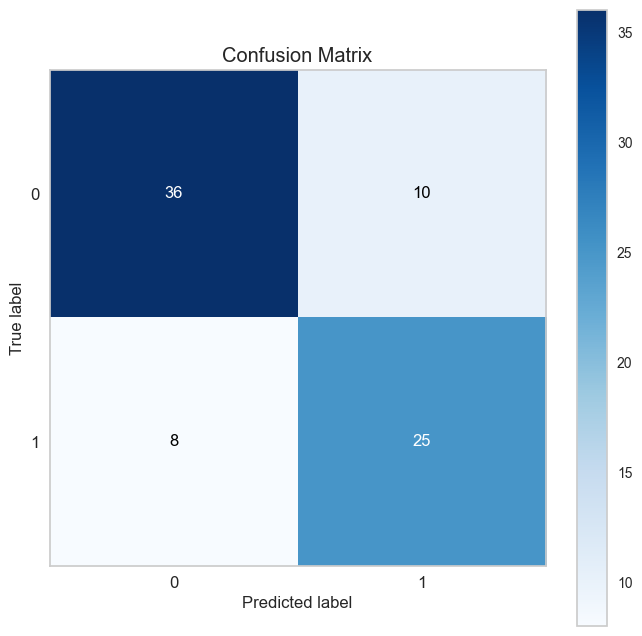

In [59]:
class_names=['parkinson', 'normal']
print(classification_report(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, target_names=class_names,zero_division=0))
cm = skplt.metrics.plot_confusion_matrix(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, figsize=(8, 8), normalize=False)

# Merged data

In [63]:
df = pd.read_csv("Final_data.csv")

In [64]:
df.drop(['Person'], axis=1, inplace=True)
df.drop(['Wav file'], axis=1, inplace=True)
df.drop(['language'], axis=1, inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer (dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,1,0.414783,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,1,0.458359,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,1,0.429895,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,1,0.434969,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,1,0.417356,-3.747787,0.234513,2.332180,0.410335


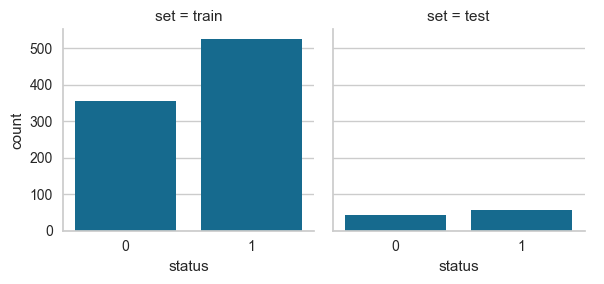

Training dataset           : 880
Unseen data for validation : 98


In [65]:
test_df = df.sample(frac=0.1)
train_df = df.drop(test_df.index).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

test_df['set'] = 'test'
train_df['set'] = 'train'

ax = sns.catplot(x="status", col="set", data=pd.concat([train_df, test_df]), kind="count", height=3)
plt.show()

print('Training dataset           :', len(train_df))
print('Unseen data for validation :', len(test_df))

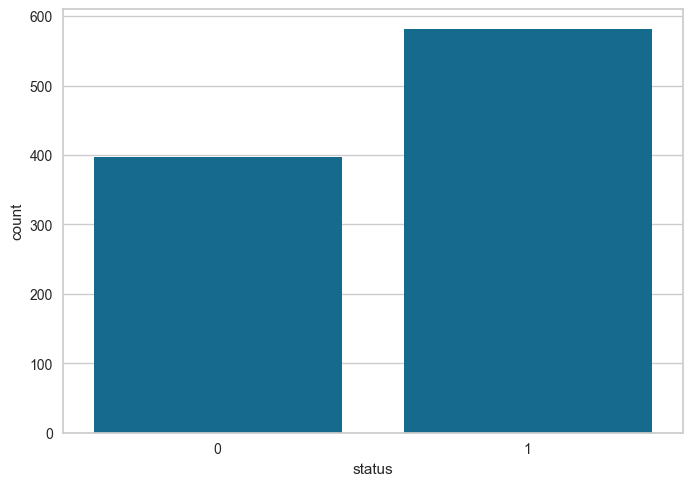

In [66]:
ax = sns.countplot(x="status", data=df)

In [67]:
clf1 = setup(data = train_df, target = 'status',ignore_features = ['name'],fix_imbalance=True, session_id=123)

,Description,Value
0,Session id,123
1,Target,status
2,Target type,Binary
3,Original data shape,"(880, 23)"
4,Transformed data shape,"(1000, 23)"
5,Transformed train set shape,"(736, 23)"
6,Transformed test set shape,"(264, 23)"
7,Ignore features,1
8,Numeric features,21
9,Categorical features,1


In [68]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8539,0.9307,0.8640,0.8908,0.8760,0.6980,0.7012,0.0460
rf,Random Forest Classifier,0.8327,0.9227,0.8453,0.8744,0.8577,0.6548,0.6595,0.0740
lightgbm,Light Gradient Boosting Machine,0.8231,0.9119,0.8396,0.8629,0.8501,0.6342,0.6367,98.6630
xgboost,Extreme Gradient Boosting,0.8229,0.9140,0.8505,0.8545,0.8515,0.6321,0.6340,0.0490
gbc,Gradient Boosting Classifier,0.8085,0.8971,0.8209,0.8567,0.8365,0.6054,0.6100,0.0720
ada,Ada Boost Classifier,0.7889,0.8576,0.7962,0.8445,0.8176,0.5672,0.5717,0.0380
dt,Decision Tree Classifier,0.7694,0.7653,0.7878,0.8241,0.8037,0.5240,0.5282,0.0210
lda,Linear Discriminant Analysis,0.7316,0.7866,0.7038,0.8268,0.7588,0.4598,0.4697,0.0160
ridge,Ridge Classifier,0.6813,0.7569,0.6708,0.7691,0.7157,0.3565,0.3623,0.0180
lr,Logistic Regression,0.6765,0.7543,0.6571,0.7686,0.7077,0.3502,0.3566,0.3650


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [69]:
model_final = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8065,0.9243,0.7838,0.8788,0.8286,0.6080,0.6133
1,0.9032,0.9427,0.9189,0.9189,0.9189,0.7989,0.7989
2,0.9194,0.9595,0.9459,0.9211,0.9333,0.8313,0.8318
3,0.8387,0.9395,0.8378,0.8857,0.8611,0.6692,0.6706
4,0.8387,0.9216,0.8108,0.9091,0.8571,0.6733,0.6792
5,0.8387,0.9400,0.8649,0.8649,0.8649,0.6649,0.6649
6,0.8689,0.9465,0.8649,0.9143,0.8889,0.7292,0.7309
7,0.9508,0.9595,0.9189,1.0000,0.9577,0.8992,0.9038
8,0.7705,0.8861,0.8889,0.7619,0.8205,0.5075,0.5192


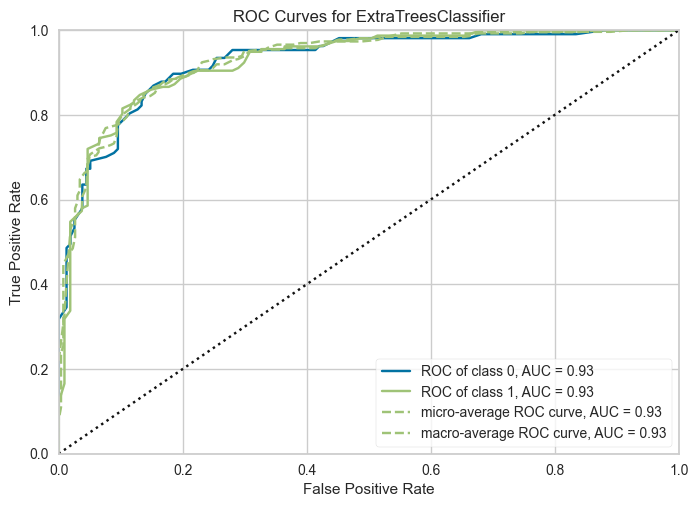

In [70]:
plot_model(model_final, plot = 'auc')

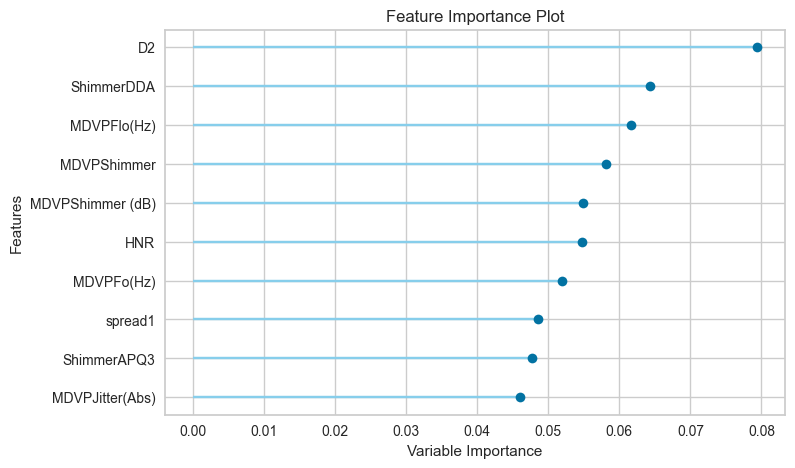

In [71]:
plot_model(model_final, plot = 'feature')

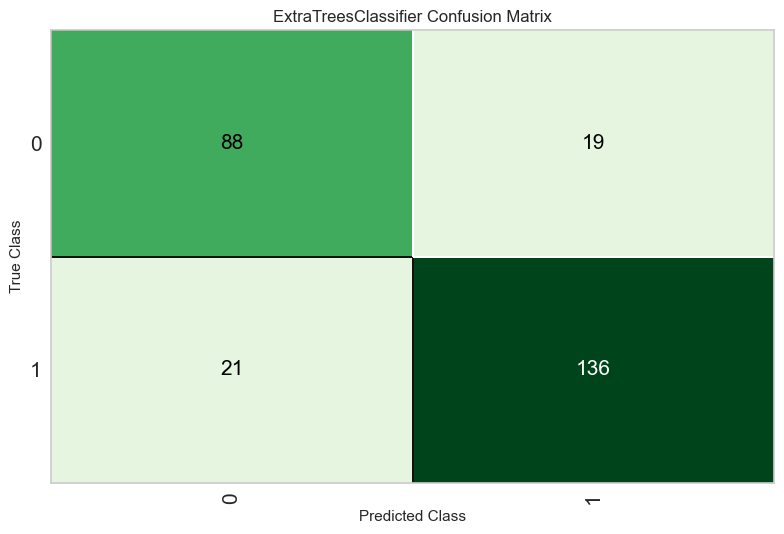

In [72]:
plot_model(model_final, plot = 'confusion_matrix')

In [73]:
final_merge = finalize_model(model_final)

In [74]:
unseen_predictions = predict_model(final_merge, data=test_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8878,0.9687,0.8750,0.9245,0.8991,0.7729,0.7743


In [75]:
unseen_predictions

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer (dB),...,HNR,RPDE,spread1,spread2,D2,PPE,set,status,prediction_label,prediction_score
0,235.093918,389.051880,208.487732,7.730417,1.322456,1.322456,2.219829,0.024590,0.037465,-28.527374,...,0.495269,-1.442695e-10,1.600012,3.947104,0.061174,0.000000,test,1,1,0.95
1,167.912903,186.817444,159.840073,1.395020,0.845613,0.845613,0.927416,0.000666,0.003462,-49.214382,...,0.405197,-1.442695e-10,2.370897,4.430252,0.012483,0.000000,test,1,1,0.81
2,176.483292,180.453751,173.302902,0.697897,0.342774,0.342774,0.575251,0.000484,0.001874,-54.546783,...,0.605916,-1.442695e-10,1.552225,3.050978,0.007503,-0.000000,test,0,0,0.88
3,189.826416,214.596893,153.506088,1.563738,0.555599,0.555599,0.792064,0.002005,0.003760,-48.495438,...,0.408639,-1.442695e-10,2.022849,4.040423,0.022427,0.000000,test,1,1,0.73
4,180.977997,200.125000,155.494995,0.004060,0.000020,0.002200,0.002440,0.006590,0.038520,0.331000,...,16.176001,5.835740e-01,-5.657899,0.315903,3.098256,0.200423,test,1,1,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,182.059174,336.738617,75.000000,22.044207,6.486761,6.486761,10.105414,0.000166,0.000508,-65.890137,...,0.284112,-1.442695e-10,49.922638,133.740753,0.294786,0.024077,test,0,0,0.88
94,151.372360,247.935089,87.658295,15.942048,4.525813,4.525813,5.531338,0.000936,0.002128,-53.440872,...,0.309071,-1.442695e-10,34.492504,68.943771,0.270451,0.007935,test,0,0,0.85
95,195.730820,203.725861,144.055939,4.027068,0.961839,0.961839,1.009984,0.001271,0.002390,-52.430374,...,0.433869,-1.442695e-10,3.141844,7.194420,0.032302,0.000000,test,1,1,0.52
96,176.717010,300.000000,77.197670,16.589396,5.451600,5.451600,7.408289,0.004889,0.010756,-39.366943,...,0.311479,-1.442695e-10,35.715858,69.635658,0.282675,0.005811,test,0,0,0.87


              precision    recall  f1-score   support

   parkinson       0.84      0.90      0.87        42
      normal       0.92      0.88      0.90        56

    accuracy                           0.89        98
   macro avg       0.88      0.89      0.89        98
weighted avg       0.89      0.89      0.89        98



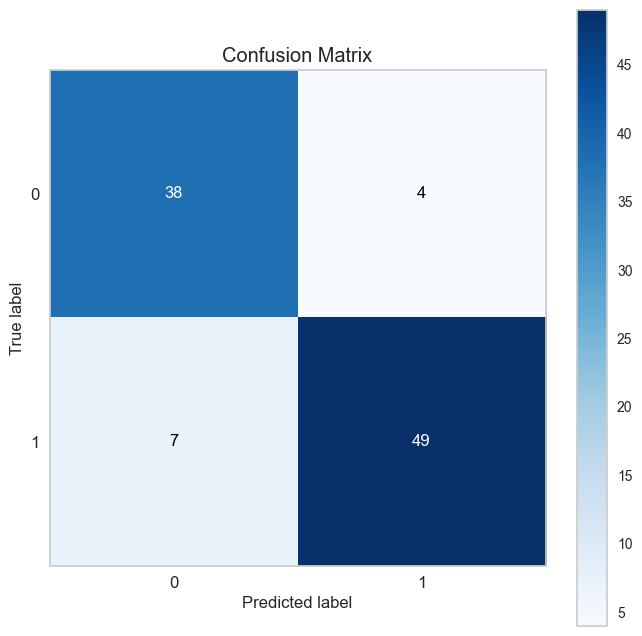

In [76]:
class_names=['parkinson', 'normal']
print(classification_report(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, target_names=class_names,zero_division=0))
cm = skplt.metrics.plot_confusion_matrix(unseen_predictions['status'].values, unseen_predictions['prediction_label'].values, figsize=(8, 8), normalize=False)

## Work in Progress